# Exemple de visualisation

In [1]:
from cassandra.cluster import Cluster
import pandas as pd
import matplotlib.pyplot as plt

Visualisation des données collectés en batch :

In [2]:
clstr = Cluster(['localhost']) 
session = clstr.connect()

In [ ]:
session.set_keyspace('projet')

query = """
SELECT heure, moyenne_disponibilite
FROM parking_batch_1
WHERE jour = 27 AND grp_nom = 'Gare Nord'
ALLOW FILTERING
"""
rows = session.execute(query)

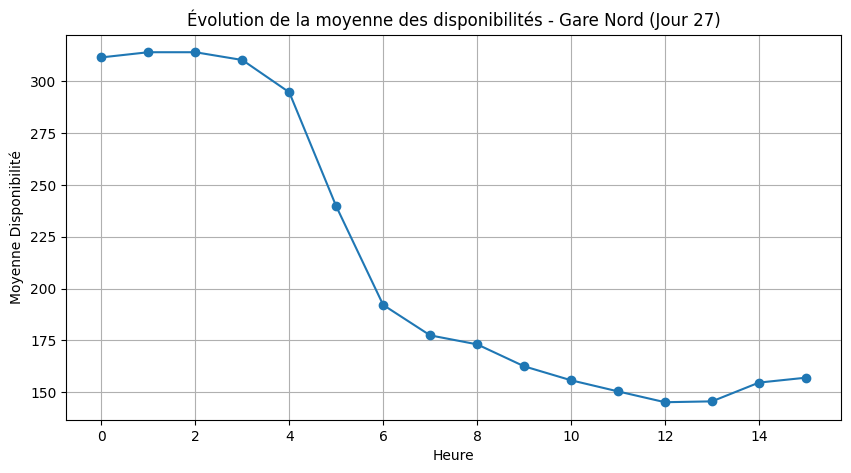

In [ ]:
# Conversion des données en DataFrame Pandas
df = pd.DataFrame(rows, columns=['heure', 'moyenne_disponibilite'])


df['heure'] = df['heure'].astype(int) 
df = df.sort_values(by='heure')

# Affichage du graphe
plt.figure(figsize=(10, 5))
plt.plot(df['heure'], df['moyenne_disponibilite'], marker='o', linestyle='-')
plt.xlabel("Heure")
plt.ylabel("Moyenne Disponibilité")
plt.title("Évolution de la moyenne des disponibilités - Gare Nord (Jour 27)")
plt.grid()
plt.show()


In [5]:
session2 = clstr.connect()

In [6]:
session2.set_keyspace('projet')

query2 = """
SELECT moyenne_disponibilite, latitude, longitude, grp_nom
FROM parking_batch_2
WHERE jour = 27 AND heure = 10
ALLOW FILTERING
"""
rows2 = session2.execute(query2)

In [ ]:
parkings = []
for row in rows2:
    parkings.append({
        'nom': row.grp_nom,
        'latitude': row.latitude,
        'longitude': row.longitude,
        'disponibilite': row.moyenne_disponibilite
    })

Feydeau
Decré-Bouffay
Tour Bretagne
Graslin
Aristide Briand
Médiathèque
Commerce
Talensac
Cité des Congrès
Cathédrale
Les machines
Descartes
Gloriette 1
Hôtel Dieu
Gare Sud 2 : Limité 1h
CHU 1
Gare Nord
Gare Sud 1
Gare Canal
Gare Sud 3
Bellamy
Gare Sud 4
Baco-LU 1
Baco-LU 2
Gloriette 2
Fonderies
CHU 2
Gare Sud 2
Les Nefs
[{'nom': 'Feydeau', 'latitude': 47.21407529499999, 'longitude': -1.552558781000016, 'disponibilite': 292.75}, {'nom': 'Decré-Bouffay', 'latitude': 47.21666261299998, 'longitude': -1.5540046290000191, 'disponibilite': 134.0}, {'nom': 'Tour Bretagne', 'latitude': 47.21784288800001, 'longitude': -1.5582500169999776, 'disponibilite': 295.8333333333333}, {'nom': 'Graslin', 'latitude': 47.214310205000004, 'longitude': -1.562571814000023, 'disponibilite': 220.5}, {'nom': 'Aristide Briand', 'latitude': 47.21709359800002, 'longitude': -1.5629364160000137, 'disponibilite': 176.83333333333334}, {'nom': 'Médiathèque', 'latitude': 47.210870821000015, 'longitude': -1.56233817399999,

In [12]:
parkings_valides = []
for parking in parkings:
    if parking['latitude'] is not None and parking['longitude'] is not None:
        # Arrondi de la moyenne de disponibilité à l'entier le plus proche
        parking['disponibilite'] = round(parking['disponibilite'])
        
        # Ajouter à la liste des parkings valides
        parkings_valides.append(parking)

In [17]:
import folium

# Créer une carte centrée sur Nantes

carte_nantes = folium.Map(location=[47.2184, -1.5536], zoom_start=12)

# Ajouter les marqueurs pour chaque parking
for parking in parkings_valides:
    folium.Marker(
        location=[parking['latitude'], parking['longitude']],
        popup=f"{parking['nom']} - Places disponibles en moyenne à 10h:{parking['disponibilite']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(carte_nantes)

carte_nantes.save("carte_parking_nantes.html")